In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('soccer_all_data.csv',header=0,usecols=[0,1,2,3,6,9,10,11,13,14,15,16,17,18,19,20],skiprows=[0,1])
#csvファイルの読み込み

In [3]:
df
#ファイルの確認

,Year,Section,name of me,name of opponent,"score(win=3,draw=1,lose=0)",mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
0,2017,7,FC東京,浦和,0,0.895833,1.0,1.6,46,1.4,1.127203,24.2,6,66,1.322053,26.5
1,2017,9,FC東京,広島,3,1.272727,1.2,1.3,46,1.4,1.127203,24.2,6,58,1.288802,25.9
2,2017,11,FC東京,柏,0,1.395833,1.4,1.2,46,1.8,1.127203,24.2,6,48,0.911073,23.2
3,2017,13,FC東京,甲府,1,2.181818,1.7,0.7,46,2.0,1.127203,24.2,6,30,0.577234,26.7
4,2017,15,FC東京,横浜FM,0,1.372549,1.2,1.2,46,1.6,1.127203,24.2,6,44,0.901097,23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,6,大分,広島,0,0.947368,0.8,1.1,43,1.2,0.671761,26.4,2,48,0.967387,27.3
1172,2021,9,大分,名古屋,0,1.033333,1.0,1.3,43,0.2,0.671761,26.4,2,63,1.099475,27.1
1173,2021,10,大分,柏,0,1.166667,0.8,0.9,43,0.0,0.671761,26.4,2,52,1.187533,26.0
1174,2021,12,大分,清水,3,1.320000,1.4,1.5,43,0.0,0.671761,26.4,2,28,1.100104,26.5


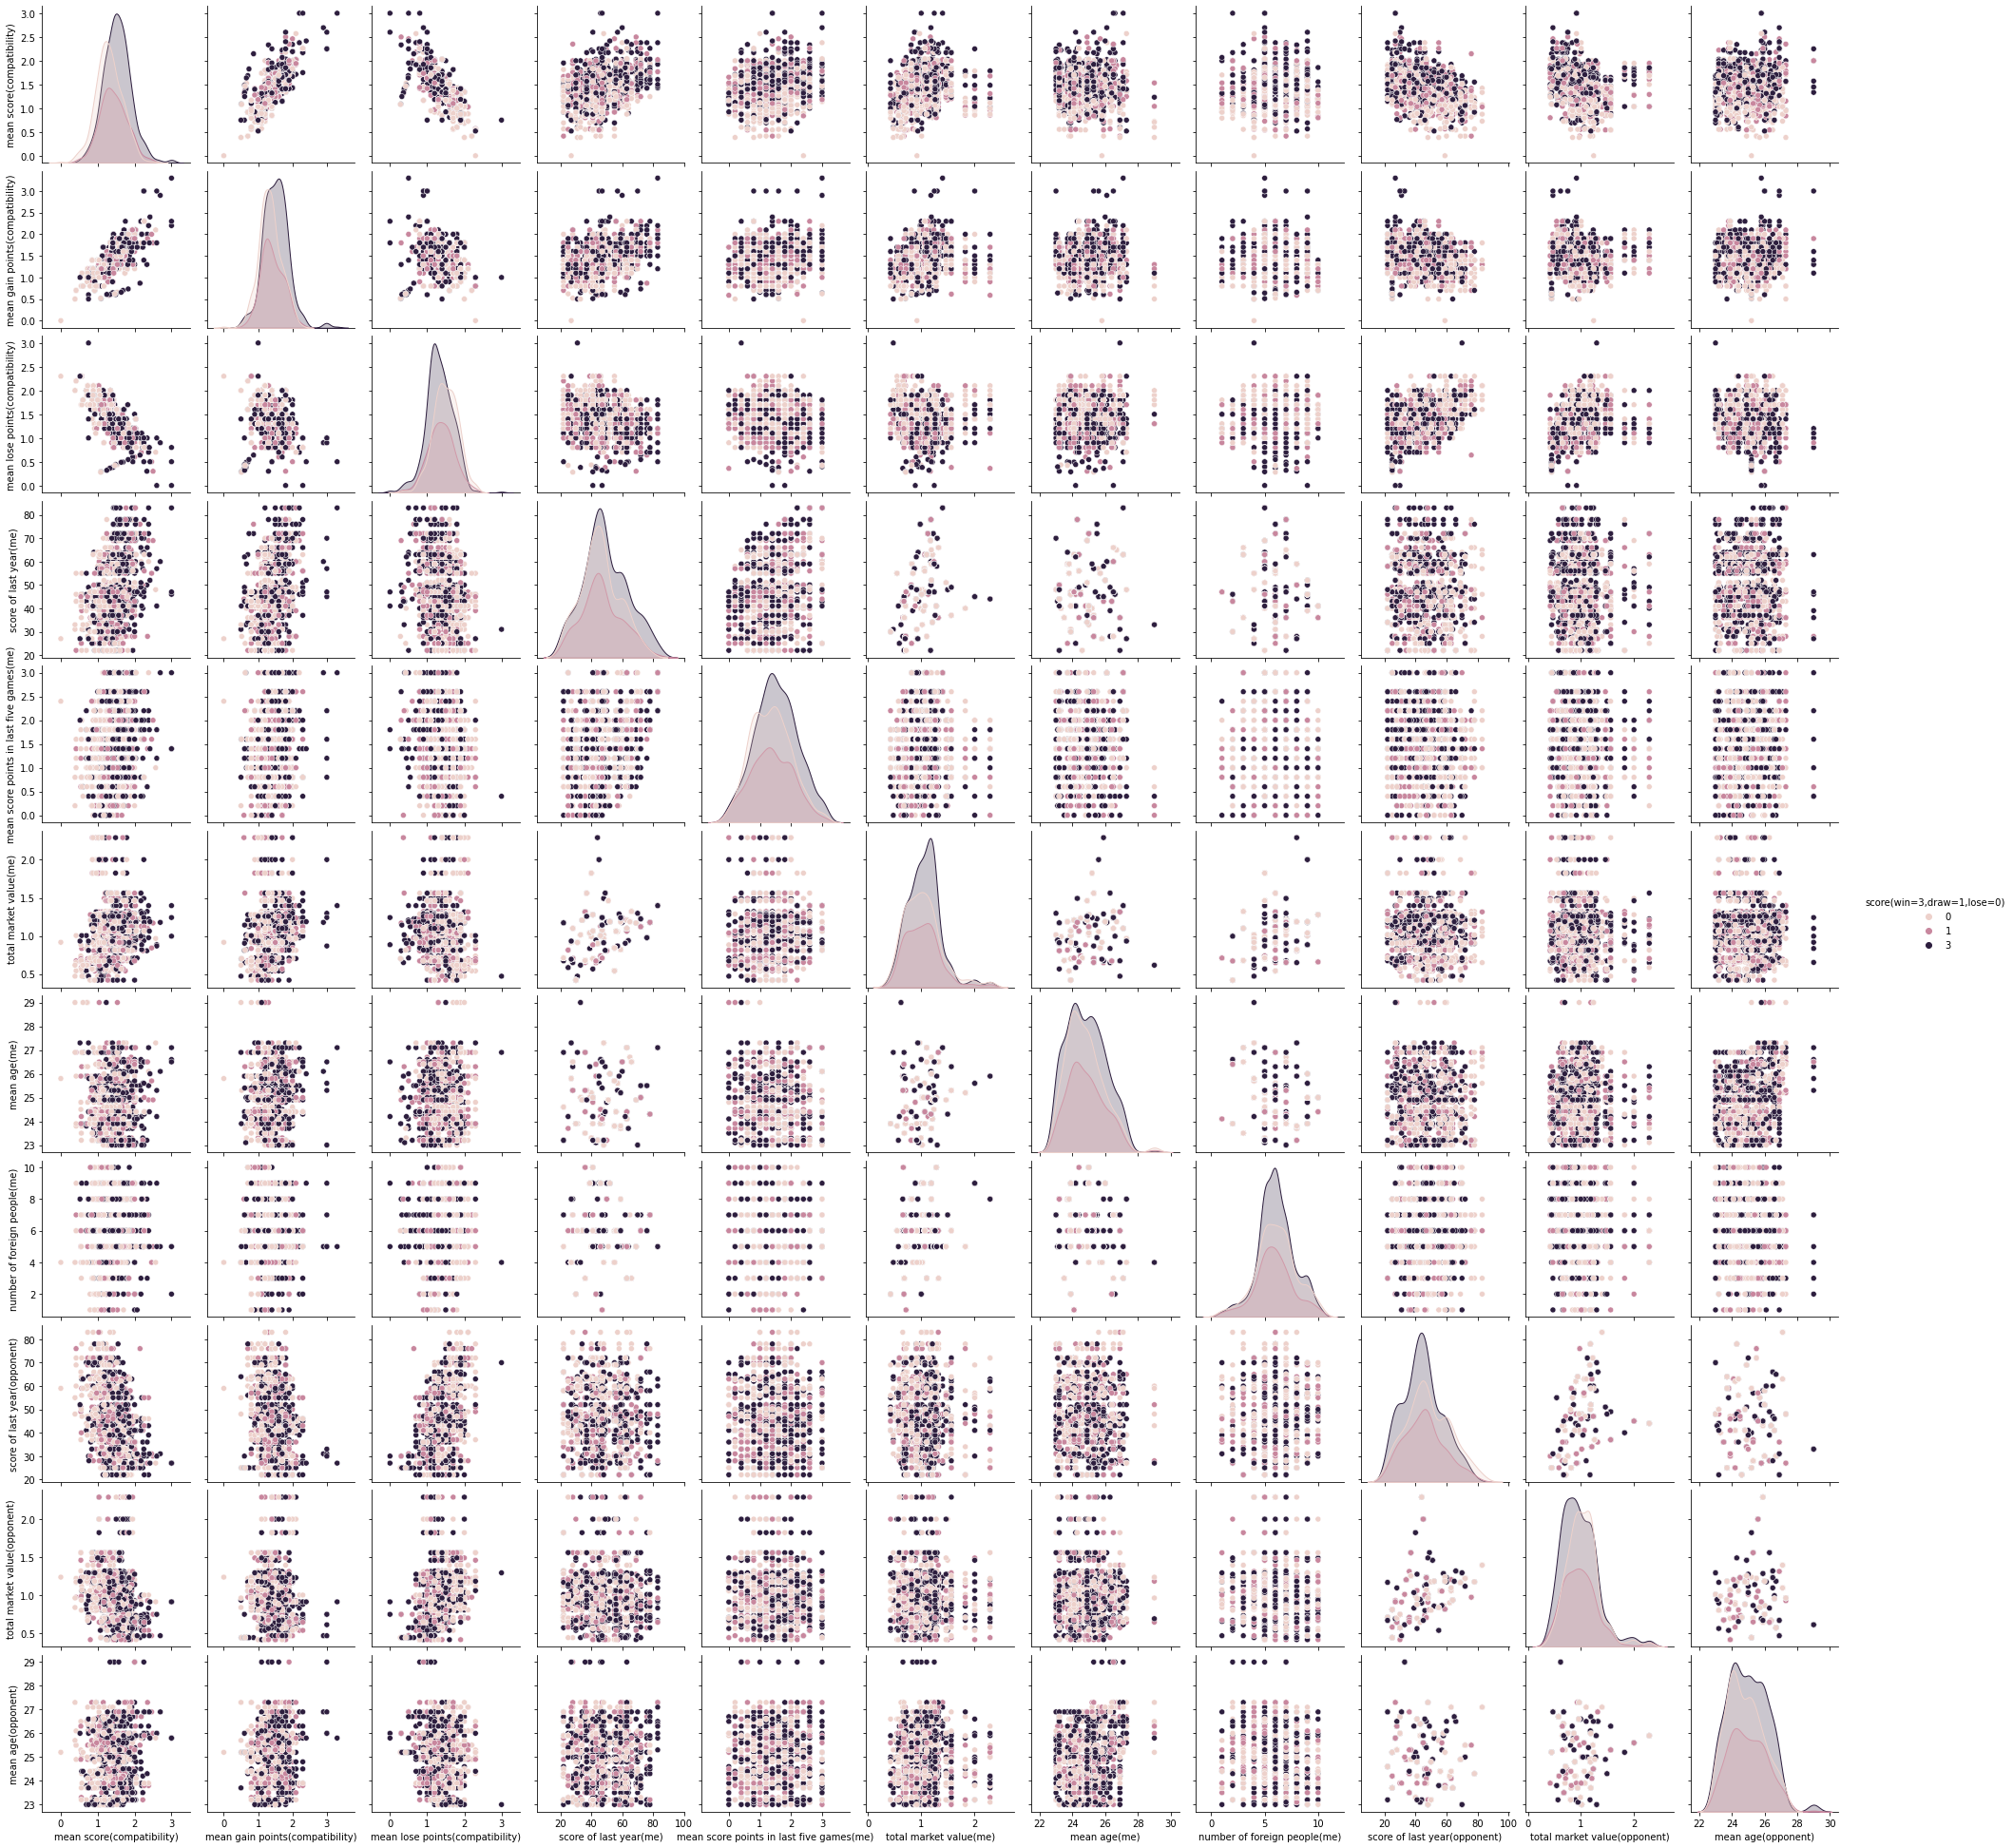

In [4]:
import matplotlib.pyplot as plt
sns.pairplot(df.iloc[:,4:16], hue ="score(win=3,draw=1,lose=0)")
plt.show()
#それぞれの説明変数がどれだけ勝敗，引き分けに影響をしているかグラフを通して確認
#3はホームチームの勝利,1は引き分け,0は負けを示している

<AxesSubplot:>

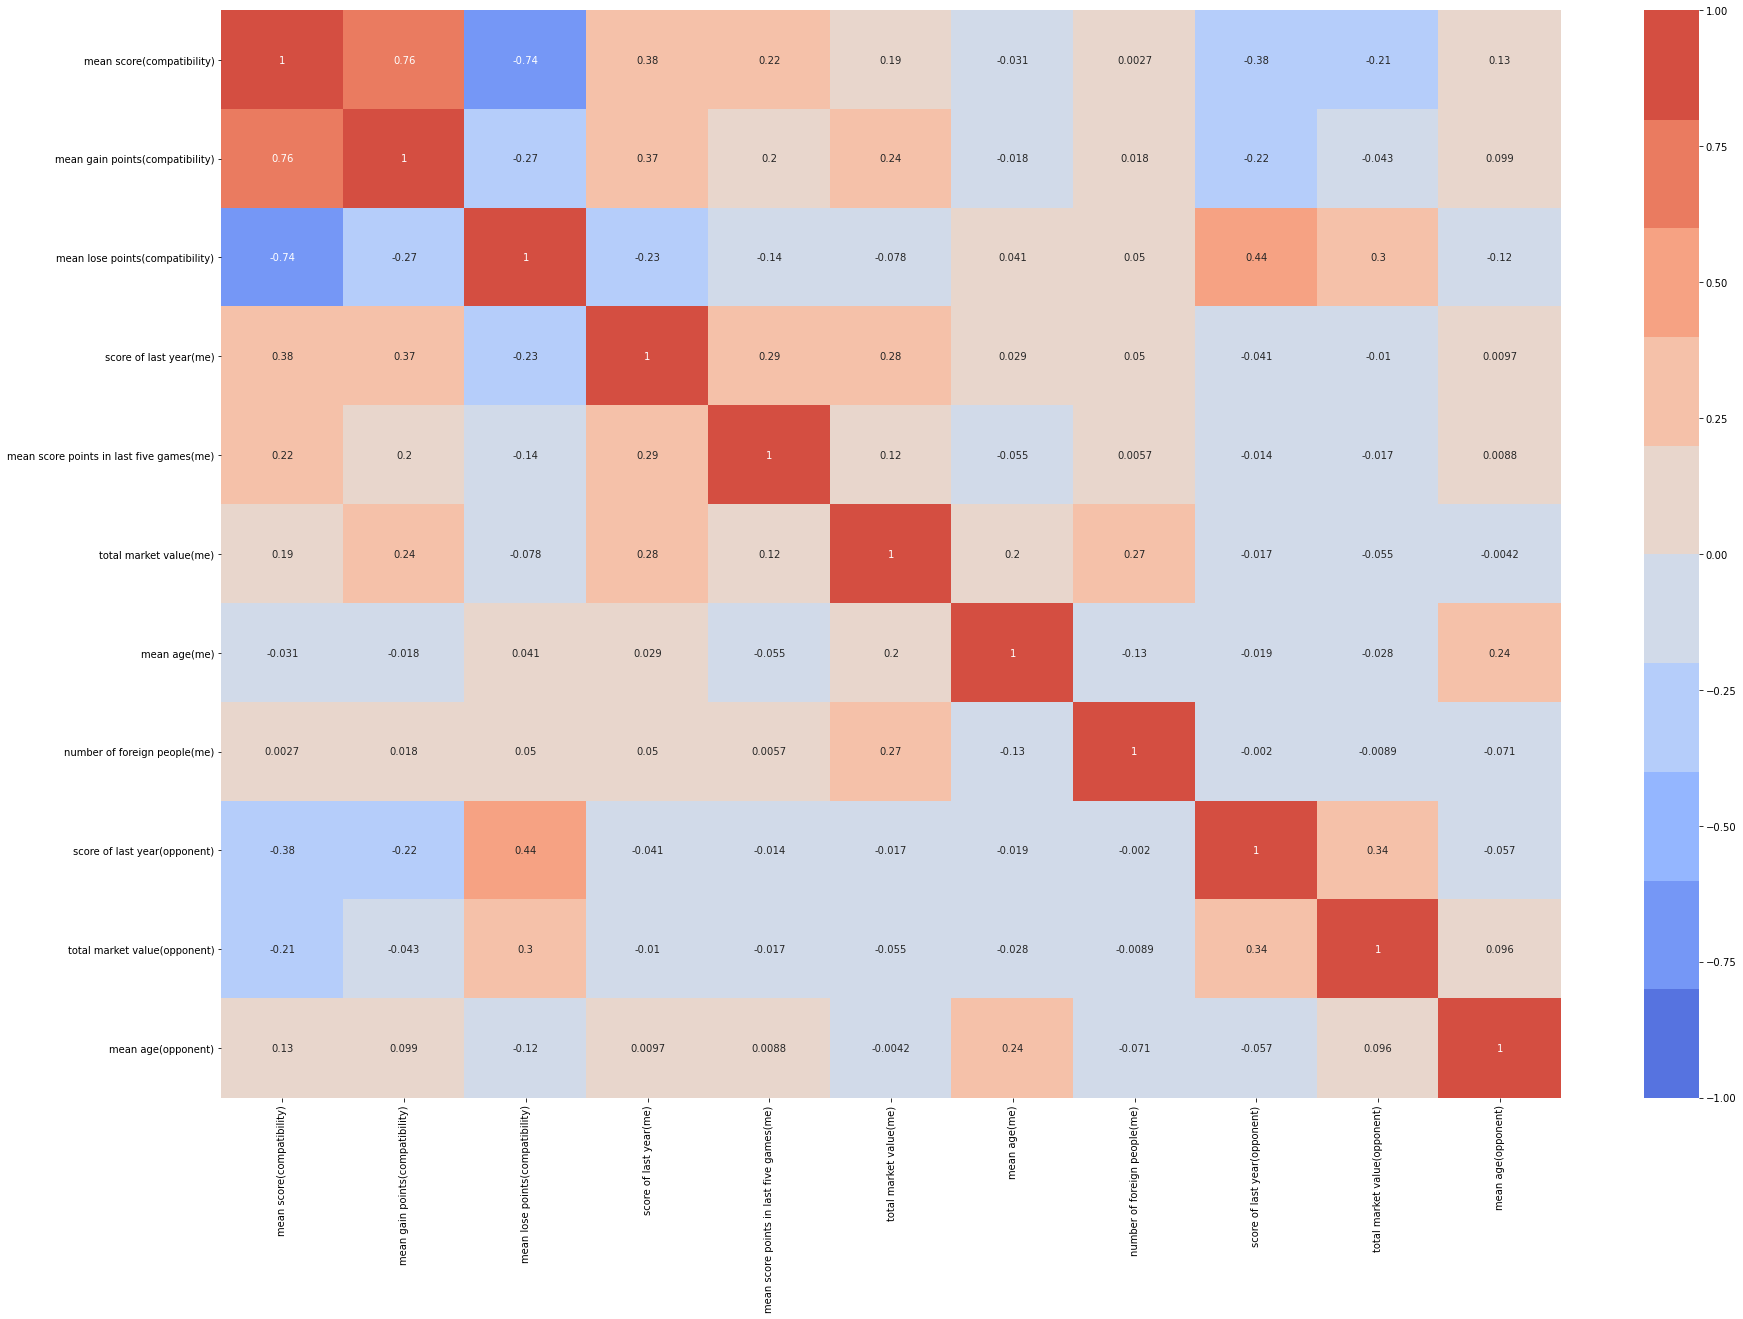

In [5]:
corrmat=df.iloc[:,5:16].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corrmat, cmap=sns.color_palette('coolwarm',10),annot=True,vmin=-1.0)
#相関行列を算出，annot=True より相関の値もわかる
#相関の値が低いときはうすくなるように設定した．この色好き

In [6]:
VIF=np.linalg.inv(corrmat)
VIF=pd.DataFrame(VIF)
VIF.columns=df.iloc[:,5:16].columns
VIF.index=df.iloc[:,5:16].columns
VIF
#VIFを確認したところ対角成分はすべて十以下だったので今回は説明変数を消去しなかった

,mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
mean score(compatibility),9.317737,-5.593835,5.309823,-0.240013,-0.154317,0.104184,-0.069226,-0.216033,-0.019703,0.089954,-0.016740
mean gain points(compatibility),-5.593835,4.652416,-3.047037,-0.203089,-0.012049,-0.280274,0.141935,0.181933,0.230374,-0.117493,-0.099904
mean lose points(compatibility),5.309823,-3.047037,4.458564,0.093336,-0.011547,0.097879,-0.179675,-0.228239,-0.494747,-0.229175,0.169686
score of last year(me),-0.240013,-0.203089,0.093336,1.323985,-0.252762,-0.240827,-0.038471,-0.001119,-0.106196,-0.061763,0.059504
mean score points in last five games(me),-0.154317,-0.012049,-0.011547,-0.252762,1.117274,-0.052028,0.079645,0.031191,-0.053497,0.005694,-0.008771
total market value(me),0.104184,-0.280274,0.097879,-0.240827,-0.052028,1.295281,-0.323102,-0.375521,-0.073720,0.052729,0.076784
mean age(me),-0.069226,0.141935,-0.179675,-0.038471,0.079645,-0.323102,1.183016,0.227983,0.058641,0.073568,-0.303322
number of foreign people(me),-0.216033,0.181933,-0.228239,-0.001119,0.031191,-0.375521,0.227983,1.140822,0.055167,0.009066,0.008499
score of last year(opponent),-0.019703,0.230374,-0.494747,-0.106196,-0.053497,-0.073720,0.058641,0.055167,1.357950,-0.306196,0.019242
total market value(opponent),0.089954,-0.117493,-0.229175,-0.061763,0.005694,0.052729,0.073568,0.009066,-0.306196,1.206964,-0.177170


In [7]:
x= pd.read_csv('soccer_all_data.csv',header=0,usecols=[9,10,11,13,14,15,16,17,18,19,20],skiprows=[0,1])
y = pd.read_csv('soccer_all_data.csv',header=0,usecols=[6],skiprows=[0,1])
#説明変数，目的変数のデータを分けて読み込み

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import statsmodels.api as sm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#データ分析のためのモジュールを読み込み，データを学習データとテストデータに分類

In [31]:
y_train
#説明変数の学習データの確認

,"score(win=3,draw=1,lose=0)"
634,0
597,3
342,0
861,1
1051,3
...,...
1033,1
763,0
835,1
559,3


In [10]:

#説明変数のテストデータの確認

,mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
483,1.786667,1.8,1.4,41,1.2,0.885111,24.2,9,57,0.868597,25.3
932,1.277778,0.9,1.3,36,0.6,0.659106,24.4,10,37,1.258200,24.9
1169,1.437500,1.1,0.8,43,1.2,0.671761,26.4,2,27,0.917068,25.8
682,0.542857,1.0,2.3,41,1.2,0.701237,23.9,5,49,1.563347,26.3
192,1.342857,1.8,2.0,50,1.4,1.179597,24.8,9,69,1.169689,24.9
...,...,...,...,...,...,...,...,...,...,...,...
829,1.939394,1.8,1.2,56,1.6,1.061252,24.4,6,41,0.566955,23.2
45,1.272727,1.2,1.3,50,2.4,0.806397,23.2,8,57,0.868597,25.3
412,1.333333,1.4,1.6,51,1.0,1.463075,24.9,5,69,1.169689,24.9
947,1.078947,1.4,1.7,25,1.4,0.585150,24.2,4,62,0.904537,24.2


In [11]:
clf=tree.DecisionTreeClassifier(min_samples_split=100,min_samples_leaf=50)
clf = clf.fit(x_train,y_train)

In [12]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))
print(clf.get_depth())

0.5170212765957447
0.4915254237288136
6


In [30]:
tree.export_graphviz(clf,"tree.dot",filled=True,feature_names=x_train.columns)
#tree.dotのふぁいるで出力　コマンドプロンぷとで後でpngに変換する

KeyError: 2

In [14]:
import graphviz

In [15]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
